# Ramya's Toxic Comment EDA

This notebook now contains the full exploratory analysis inline, so it can run in environments like Colab without cloning the entire repository.

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# Label columns from the Jigsaw toxic comment dataset
LABEL_COLUMNS = [
    "toxic",
    "severe_toxic",
    "obscene",
    "threat",
    "insult",
    "identity_hate",
]


In [12]:
data_path = "/content/ramya_exploratory_analysis/train.csv"

df = pd.read_csv(data_path)
df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [13]:
#Basic info & null values

print("Shape (rows, columns):", df.shape)
print("\nData types:")
print(df.dtypes)

print("\nNull values per column:")
null_counts = df.isnull().sum()
print(null_counts)

# Optional: percentage of nulls
null_pct = (df.isnull().mean() * 100).round(3)
print("\nNull percentage per column:")
print(null_pct)


Shape (rows, columns): (159571, 8)

Data types:
id               object
comment_text     object
toxic             int64
severe_toxic      int64
obscene           int64
threat            int64
insult            int64
identity_hate     int64
dtype: object

Null values per column:
id               0
comment_text     0
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
dtype: int64

Null percentage per column:
id               0.0
comment_text     0.0
toxic            0.0
severe_toxic     0.0
obscene          0.0
threat           0.0
insult           0.0
identity_hate    0.0
dtype: float64


In [14]:
#Plot null values (if any)
non_zero_nulls = null_counts[null_counts > 0]

if not non_zero_nulls.empty:
    plt.figure(figsize=(8,4))
    non_zero_nulls.plot(kind="bar")
    plt.title("Null Values per Column")
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print("No null values in any column ")

No null values in any column 


In [15]:
#How many rows without any labels?

# Make sure label columns exist
missing_labels = set(LABEL_COLUMNS) - set(df.columns)
if missing_labels:
    raise ValueError(f"Missing expected label columns: {missing_labels}")

labels_df = df[LABEL_COLUMNS]

# total rows
total_rows = len(df)

# how many labels per row
labels_per_row = labels_df.sum(axis=1)

# rows with no label (all zeros)
no_label_rows = (labels_per_row == 0).sum()
at_least_one_label_rows = total_rows - no_label_rows

print("Total rows:", total_rows)
print("Rows with NO toxic labels:", no_label_rows)
print("Rows with at least one label:", at_least_one_label_rows)
print("Percentage without label:", round(no_label_rows / total_rows * 100, 2), "%")


Total rows: 159571
Rows with NO toxic labels: 143346
Rows with at least one label: 16225
Percentage without label: 89.83 %


Label counts:
toxic            15294
obscene           8449
insult            7877
severe_toxic      1595
identity_hate     1405
threat             478
dtype: int64

Label percentages:
toxic            9.584
obscene          5.295
insult           4.936
severe_toxic     1.000
identity_hate    0.880
threat           0.300
dtype: float64


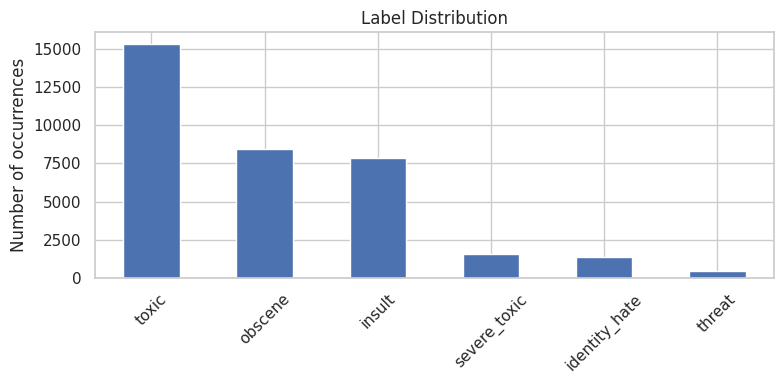

In [16]:
#Count of each label + bar plot

label_counts = labels_df.sum().sort_values(ascending=False)
label_pct = (label_counts / total_rows * 100).round(3)

print("Label counts:")
print(label_counts)

print("\nLabel percentages:")
print(label_pct)

plt.figure(figsize=(8,4))
label_counts.plot(kind="bar")
plt.title("Label Distribution")
plt.ylabel("Number of occurrences")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Number of labels per comment:
0    143346
1      6360
2      3480
3      4209
4      1760
5       385
6        31
Name: count, dtype: int64


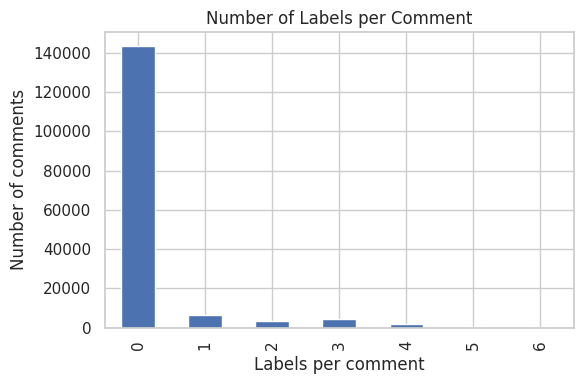

In [17]:
#How many labels per comment? (cardinality)
labels_per_row_counts = labels_per_row.value_counts().sort_index()
print("Number of labels per comment:")
print(labels_per_row_counts)

plt.figure(figsize=(6,4))
labels_per_row_counts.plot(kind="bar")
plt.title("Number of Labels per Comment")
plt.xlabel("Labels per comment")
plt.ylabel("Number of comments")
plt.tight_layout()
plt.show()

In [18]:
# Text length stats (chars & words)
# Character length
df["char_length"] = df["comment_text"].astype(str).str.len()

# Word count
df["word_count"] = df["comment_text"].astype(str).apply(lambda x: len(x.split()))

print("Character length summary:")
print(df["char_length"].describe())

print("\nWord count summary:")
print(df["word_count"].describe())

Character length summary:
count    159571.000000
mean        394.073221
std         590.720282
min           6.000000
25%          96.000000
50%         205.000000
75%         435.000000
max        5000.000000
Name: char_length, dtype: float64

Word count summary:
count    159571.000000
mean         67.273527
std          99.230702
min           1.000000
25%          17.000000
50%          36.000000
75%          75.000000
max        1411.000000
Name: word_count, dtype: float64


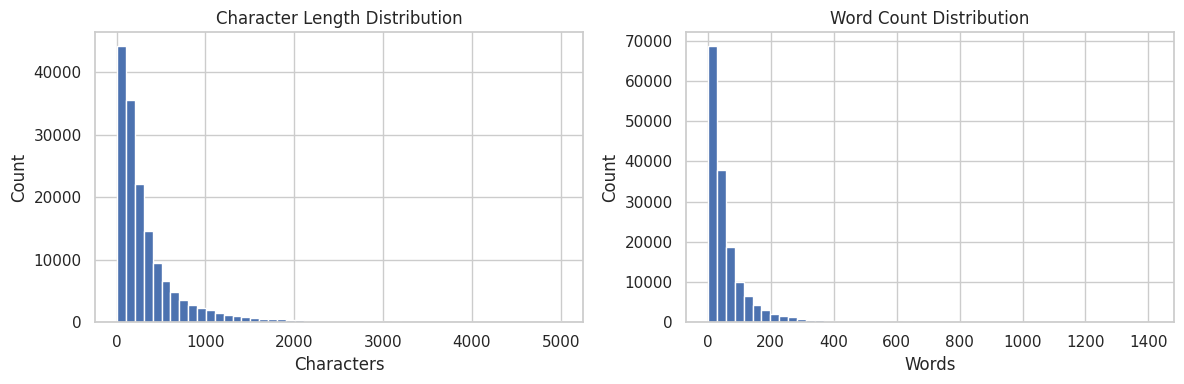

In [19]:
# Plot text length distributions
fig, axes = plt.subplots(1, 2, figsize=(12,4))

# Character length
axes[0].hist(df["char_length"], bins=50)
axes[0].set_title("Character Length Distribution")
axes[0].set_xlabel("Characters")
axes[0].set_ylabel("Count")

# Word count
axes[1].hist(df["word_count"], bins=50)
axes[1].set_title("Word Count Distribution")
axes[1].set_xlabel("Words")
axes[1].set_ylabel("Count")

plt.tight_layout()
plt.show()

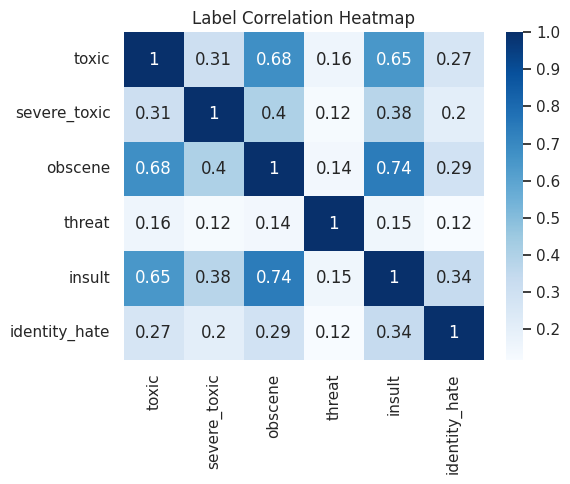

In [20]:
#Correlation between labels (heatmap)
plt.figure(figsize=(6,5))
corr = labels_df.corr()
import seaborn as sns
sns.heatmap(corr, annot=True, cmap="Blues")
plt.title("Label Correlation Heatmap")
plt.tight_layout()
plt.show()